In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

/home/d/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv("../data/raw/datasets_902_370089_accepted_2007_to_2018Q4.csv")

/home/d/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df['loan_status'].value_counts()

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64

In [4]:
df_accept = df.sample(frac=0.1)

In [5]:
len(df_accept)

226070

In [6]:
pd.options.display.max_columns

20

In [7]:
pd.options.display.max_columns = len(df_accept.columns)

In [8]:
df_accept.shape

(226070, 151)

In [9]:
df_accept.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
552593,118268197,NaN,17000.0,17000.0,17000.0,60 months,30.84,558.82,G,G2,Union Laborer,10+ years,RENT,50000.0,Source Verified,Sep-2017,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,credit_card,Credit card refinancing,027xx,MA,19.01,0.0,Jan-1993,670.0,674.0,0.0,NaN,102.0,7.0,1.0,16601.0,56.3,15.0,w,0.00,0.00,7480.990000,7480.99,1079.52,3942.69,111.76,2347.02,211.2318,Jul-2018,590.00,NaN,Dec-2018,544.0,540.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,302.0,16601.0,1.0,0.0,0.0,0.0,120.0,0.0,NaN,3.0,5.0,5791.0,56.0,29500.0,0.0,0.0,0.0,5.0,2372.0,7947.0,50.3,0.0,0.0,135.0,296.0,1.0,1.0,1.0,1.0,NaN,18.0,NaN,0.0,4.0,5.0,5.0,5.0,3.0,7.0,11.0,5.0,7.0,0.0,0.0,0.0,3.0,100.0,40.0,1.0,0.0,29500.0,16601.0,16000.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
317869,46155039,NaN,16000.0,16000.0,16000.0,36 months,9.17,510.07,B,B2,Managing Partner,10+ years,MORTGAGE,125000.0,Verified,Apr-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,credit_card,Credit card refinancing,358xx,AL,12.31,0.0,Mar-2001,680.0,684.0,0.0,NaN,NaN,20.0,0.0,31996.0,53.3,28.0,f,0.00,0.00,18303.619875,18303.62,16000.00,2303.62,0.00,0.00,0.0000,Nov-2017,3009.67,NaN,Jul-2018,574.0,570.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,256596.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60000.0,NaN,NaN,NaN,9.0,12830.0,15776.0,60.1,0.0,0.0,169.0,88.0,4.0,4.0,3.0,4.0,NaN,5.0,NaN,0.0,9.0,15.0,11.0,13.0,3.0,18.0,22.0,15.0,20.0,0.0,0.0,0.0,2.0,100.0,63.6,0.0,0.0,313410.0,

In [10]:
df_accept.loan_status.unique()

array(['Charged Off', 'Fully Paid', 'Current', 'Late (31-120 days)',
       'Late (16-30 days)', 'In Grace Period',
       'Does not meet the credit policy. Status:Charged Off',
       'Does not meet the credit policy. Status:Fully Paid', nan,
       'Default'], dtype=object)

In [11]:
df_accept.loan_status.isna().sum()

2

In [12]:
df_drop =  df_accept.loc[df_accept.loan_status.isna()]

In [13]:
df_accept.drop(df_drop.index, inplace=True)

In [14]:
df_accept.loan_status.unique()

array(['Charged Off', 'Fully Paid', 'Current', 'Late (31-120 days)',
       'Late (16-30 days)', 'In Grace Period',
       'Does not meet the credit policy. Status:Charged Off',
       'Does not meet the credit policy. Status:Fully Paid', 'Default'],
      dtype=object)

In [15]:
len(df_accept)

226068

In [16]:
len(df_accept.loan_status)

226068

In [17]:
df_accept.loan_status.value_counts()

Fully Paid                                             107827
Current                                                 87905
Charged Off                                             26759
Late (31-120 days)                                       2035
In Grace Period                                           852
Late (16-30 days)                                         433
Does not meet the credit policy. Status:Fully Paid        185
Does not meet the credit policy. Status:Charged Off        69
Default                                                     3
Name: loan_status, dtype: int64

In [18]:
temp = df_accept.loan_status == 'Current'

In [19]:
current_rows = df_accept[temp]

In [20]:
len(current_rows)

87905

In [21]:
# lets remove the loan which are current
df_accept.drop(current_rows.index, inplace=True)

In [22]:
df_accept.loan_status.unique()

array(['Charged Off', 'Fully Paid', 'Late (31-120 days)',
       'Late (16-30 days)', 'In Grace Period',
       'Does not meet the credit policy. Status:Charged Off',
       'Does not meet the credit policy. Status:Fully Paid', 'Default'],
      dtype=object)

In [23]:
# now lets change the loan_status in two category only (0 = Default, 1 = None-Default)
default_column_names = ["Charged Off", "Late (31-120 days)", "In Grace Period", "In Grace Period", "Does not meet the credit policy. Status:Charged Off", "Default" ]
def change_loan_status(status):
    if status in default_column_names:
        return 0
    else:
        return 1

In [24]:
df_accept.loan_status = df_accept.loan_status.apply(change_loan_status)

In [25]:
df_accept.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
552593,118268197,NaN,17000.0,17000.0,17000.0,60 months,30.84,558.82,G,G2,Union Laborer,10+ years,RENT,50000.0,Source Verified,Sep-2017,0,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,credit_card,Credit card refinancing,027xx,MA,19.01,0.0,Jan-1993,670.0,674.0,0.0,NaN,102.0,7.0,1.0,16601.0,56.3,15.0,w,0.0,0.0,7480.990000,7480.99,1079.52,3942.69,111.76,2347.02,211.2318,Jul-2018,590.00,NaN,Dec-2018,544.0,540.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,302.0,16601.0,1.0,0.0,0.0,0.0,120.0,0.0,NaN,3.0,5.0,5791.0,56.0,29500.0,0.0,0.0,0.0,5.0,2372.0,7947.0,50.3,0.0,0.0,135.0,296.0,1.0,1.0,1.0,1.0,NaN,18.0,NaN,0.0,4.0,5.0,5.0,5.0,3.0,7.0,11.0,5.0,7.0,0.0,0.0,0.0,3.0,100.0,40.0,1.0,0.0,29500.0,16601.0,16000.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
317869,46155039,NaN,16000.0,16000.0,16000.0,36 months,9.17,510.07,B,B2,Managing Partner,10+ years,MORTGAGE,125000.0,Verified,Apr-2015,1,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,credit_card,Credit card refinancing,358xx,AL,12.31,0.0,Mar-2001,680.0,684.0,0.0,NaN,NaN,20.0,0.0,31996.0,53.3,28.0,f,0.0,0.0,18303.619875,18303.62,16000.00,2303.62,0.00,0.00,0.0000,Nov-2017,3009.67,NaN,Jul-2018,574.0,570.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,256596.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60000.0,NaN,NaN,NaN,9.0,12830.0,15776.0,60.1,0.0,0.0,169.0,88.0,4.0,4.0,3.0,4.0,NaN,5.0,NaN,0.0,9.0,15.0,11.0,13.0,3.0,18.0,22.0,15.0,20.0,0.0,0.0,0.0,2.0,100.0,63.6,0.0,0.0,313410.0,33831.0,39500.0,22712.0

In [26]:
df_accept.loan_status.value_counts()

1    108445
0     29718
Name: loan_status, dtype: int64

In [27]:
# calculating for missing data percentage
missing_value_count = df_accept.isnull().sum()
missing_per = missing_value_count / len(df_accept) * 100
missing_per

id                         0.000000
member_id                100.000000
loan_amnt                  0.000000
funded_amnt                0.000000
funded_amnt_inv            0.000000
                            ...    
settlement_status         97.604279
settlement_date           97.604279
settlement_amount         97.604279
settlement_percentage     97.604279
settlement_term           97.604279
Length: 151, dtype: float64

In [28]:
# missing data more then 50%
missing_data_columns = missing_per[missing_per >= 50].index.values

In [29]:
missing_data_columns

array(['member_id', 'desc', 'mths_since_last_delinq',
       'mths_since_last_record', 'next_pymnt_d',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'open_acc_6m', 'open_act_il',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'mths_since_recent_bc_dlq', 'mths_since_recent_revol_delinq',
       'revol_bal_joint', 'sec_app_fico_range_low',
       'sec_app_fico_range_high', 'sec_app_earliest_cr_line',
       'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_open_acc',
       'sec_app_revol_util', 'sec_app_open_act_il',
       'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths',
       'sec_app_collections_12_mths_ex_med',
       'sec_app_mths_since_last_major_derog', 'hardship_type',
       'hardship_reason', 'hardship_status', 'deferral_term',
       'hardship_

In [30]:
# dropping column which have more then 40% data missing
df_accept.drop(columns=missing_data_columns, inplace=True)

In [31]:
len(df_accept.columns)

93

In [32]:
df_accept.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'acc_open_past_24mths', 'a

In [33]:
# now lets work on NA values
def display_na_per(df_accept):
    null_count = df_accept.isna().sum()
    total_count = len(df_accept)
    per = null_count / total_count * 100
    missing_df = pd.concat([null_count, per], axis=1)
    missing_df.columns = ["Null Counts", "Percentage"]
    return missing_df.sort_values(by="Percentage", ascending=False).T
display_na_per(df_accept)

,mths_since_recent_inq,num_tl_120dpd_2m,mo_sin_old_il_acct,emp_title,emp_length,pct_tl_nvr_dlq,avg_cur_bal,num_accts_ever_120_pd,num_op_rev_tl,num_il_tl,num_actv_rev_tl,num_actv_bc_tl,num_bc_tl,num_rev_tl_bal_gt_0,mo_sin_rcnt_tl,mo_sin_rcnt_rev_tl_op,mo_sin_old_rev_tl_op,total_rev_hi_lim,tot_cur_bal,num_rev_accts,tot_coll_amt,tot_hi_cred_lim,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,total_il_high_credit_limit,bc_util,percent_bc_gt_75,bc_open_to_buy,mths_since_recent_bc,num_sats,num_bc_sats,total_bal_ex_mort,acc_open_past_24mths,mort_acc,total_bc_limit,title,last_pymnt_d,pub_rec_bankruptcies,revol_util,dti,chargeoff_within_12_mths,collections_12_mths_ex_med,tax_liens,last_credit_pull_d,delinq_amnt,acc_now_delinq,hardship_flag,disbursement_method,id,last_fico_range_high,application_type,verification_status,delinq_2yrs,addr_state,zip_code,purpose,url,pymnt_plan,loan_status,issue_d,annual_inc,policy_code,home_ownership,sub_grade,grade,installment,int_rate,term,funded_amnt_inv,funded_amnt,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,last_fico_range_low,loan_amnt,last_pymnt_amnt,collection_recovery_fee,recoveries,total_rec_late_fee,total_rec_int,total_rec_prncp,total_pymnt_inv,total_pymnt,out_prncp_inv,out_prncp,initial_list_status,total_acc,revol_bal,pub_rec,open_acc,debt_settlement_flag
Null Counts,17906.000000,12154.000000,10854.000000,8760.000000,7977.000000,6976.000000,6961.000000,6958.000000,6958.000000,6958.000000,6958.000000,6958.000000,6958.000000,6958.000000,6958.000000,6958.000000,6958.000000,6958.000000,6958.000000,6958.000000,6958.000000,6958.000000,6958.000000,6958.000000,6958.000000,6958.000000,6413.000000,6387.000000,6343.000000,6265.000000,5820.000000,5820.000000,4958.000000,4958.000000,4958.000000,4958.000000,1702.000000,248.000000,136.000000,85.000000,43.000000,8.00000,8.00000,5.000000,5.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percentage,12.960054,8.796856,7.855938,6.340337,5.773615,5.049109,5.038252,5.036081,5.036081,5.036081,5.036081,5.036081,5.036081,5.036081,5.036081,5.036081,5.036081,5.036081,5.036081,5.036081,5.036081,5.036081,5.036081,5.036081,5.036081,5.036081,4.641619,4.622801,4.590954,4.534499,4.212416,4.212416,3.588515,3.588515,3.588515,3.588515,1.231878,0.179498,0.098434,0.061522,0.031123,0.00579,0.00579,0.003619,0.003619,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
# dropping row which have more then 10 missing values
rows_na_index = df_accept[df_accept.isna().sum(axis=1) >= 20].index

In [35]:
df_accept.drop(rows_na_index, inplace=True)

In [36]:
display_na_per(df_accept)

,mths_since_recent_inq,emp_title,emp_length,num_tl_120dpd_2m,mo_sin_old_il_acct,title,bc_util,percent_bc_gt_75,bc_open_to_buy,mths_since_recent_bc,last_pymnt_d,revol_util,dti,pct_tl_nvr_dlq,last_credit_pull_d,avg_cur_bal,mo_sin_old_rev_tl_op,mort_acc,mo_sin_rcnt_tl,mo_sin_rcnt_rev_tl_op,total_rev_hi_lim,tot_coll_amt,tot_cur_bal,delinq_amnt,chargeoff_within_12_mths,num_accts_ever_120_pd,acc_open_past_24mths,id,num_bc_tl,num_actv_bc_tl,num_tl_op_past_12m,disbursement_method,hardship_flag,total_il_high_credit_limit,total_bc_limit,total_bal_ex_mort,tot_hi_cred_lim,tax_liens,pub_rec_bankruptcies,num_tl_90g_dpd_24m,num_actv_rev_tl,num_tl_30dpd,num_sats,num_rev_tl_bal_gt_0,num_rev_accts,num_op_rev_tl,num_il_tl,application_type,num_bc_sats,acc_now_delinq,last_fico_range_high,policy_code,verification_status,delinq_2yrs,addr_state,zip_code,purpose,url,pymnt_plan,loan_status,issue_d,annual_inc,collections_12_mths_ex_med,home_ownership,sub_grade,grade,installment,int_rate,term,funded_amnt_inv,funded_amnt,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,last_fico_range_low,loan_amnt,last_pymnt_amnt,collection_recovery_fee,recoveries,total_rec_late_fee,total_rec_int,total_rec_prncp,total_pymnt_inv,total_pymnt,out_prncp_inv,out_prncp,initial_list_status,total_acc,revol_bal,pub_rec,open_acc,debt_settlement_flag
Null Counts,12681.000000,8333.00000,7776.000000,5196.000000,3896.000000,1700.000000,1422.0000,1397.000000,1353.000000,1279.00000,238.000000,74.0000,43.000000,18.000000,4.000000,3.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percentage,9.665028,6.35113,5.926603,3.960215,2.969399,1.295682,1.0838,1.064746,1.031211,0.97481,0.181396,0.0564,0.032773,0.013719,0.003049,0.002286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
# drop emp_length value that does not have any other way to find the year
emp_length_drop_index = df_accept[df_accept["emp_length"].isna()].index
df_accept.drop(emp_length_drop_index, inplace=True)

In [38]:
# replacing N/A with zero
df_accept["mths_since_recent_inq"] = df_accept["mths_since_recent_inq"].replace(np.nan, 0)
# creating the new employee title NA which is for N/A people
df_accept["emp_title"] = df_accept["emp_title"].replace(np.nan, "NA")
# removing the year from the emp_length
df_accept["emp_length"] = df_accept["emp_length"].replace(r"years|year","", regex=True).str.strip()
# replacing the N/A value with zero as they hace three category only
df_accept["num_tl_120dpd_2m"] = df_accept["num_tl_120dpd_2m"].replace(np.nan,0)
# replacing the N/A with the zero because the min value start from 1 so information not available so i have make it zero
df_accept["mo_sin_old_il_acct"] = df_accept["mo_sin_old_il_acct"].replace(np.nan, 0)
# replacing the N/A with the NO_TITLE as that have many different title
df_accept["title"] = df_accept["title"].replace(np.nan, "NO_TITLE")
# replacing the "bc_util" it is ratio blance of high credit so replacing with mean
bc_util_na_index = df_accept[df_accept["bc_util"].isna()].index
df_accept.loc[bc_util_na_index, "bc_util"] = df_accept["bc_util"].mean()
# replacing the "percent_bc_gt_75" it is percentage so replacing with the mean
precent_bc_gt_75_na_index = df_accept[df_accept["percent_bc_gt_75"].isna()].index
df_accept.loc[precent_bc_gt_75_na_index, "percent_bc_gt_75"] = df_accept["percent_bc_gt_75"].mean()
# replacing the "bc_open_to_buy" It has the less amount of the N/A value so replacing with zero
df_accept["bc_open_to_buy"] = df_accept["bc_open_to_buy"].replace(np.nan, 0)
# replacing the "mths_since_recent_bc" It has the less amount of the N/a value so replacing with zero
df_accept["mths_since_recent_bc"] = df_accept["mths_since_recent_bc"].replace(np.nan, 0)

In [39]:
# droing last_payment_date missing values
last_payment_na_index = df_accept[df_accept["last_pymnt_d"].isna()].index
df_accept.drop(last_payment_na_index, inplace=True)

In [40]:
# replacing the "revol_util" with mean value because it is ratio value how much amount of credit the borrower is using relative to all available revolving credit.
#df_accept.loc[]
revol_util_index = df_accept[df_accept["revol_util"].isna()].index
df_accept.loc[revol_util_index, "revol_util"] = df_accept["revol_util"].mean()

In [41]:
# replacing the "pct_tl_nvr_dlq" with mean value because it is percentage trades never delinquent 
pct_tl_nvr_dlq_na_index = df_accept[df_accept["pct_tl_nvr_dlq"].isna()].index
df_accept.loc[pct_tl_nvr_dlq_na_index , "pct_tl_nvr_dlq"] = df_accept["pct_tl_nvr_dlq"].mean()

In [42]:
# droping the "last_credit_pull_d" as it is date
last_credit_pull_d_na_index = df_accept[df_accept["last_credit_pull_d"].isna()].index
df_accept.drop(last_credit_pull_d_na_index, inplace=True)

In [43]:
# replacing the "avg_cur_bal" with mean value 
avg_cur_bal_na_index = df_accept[df_accept["avg_cur_bal"].isna()].index
df_accept.loc[avg_cur_bal_na_index, "avg_cur_bal"] = df_accept["avg_cur_bal"].mean()

In [44]:
# replacing the "dti" with mean value
dti_na_index = df_accept[df_accept["dti"].isna()].index
df_accept.loc[dti_na_index, "dti"] = df_accept["dti"].mean()

In [45]:
# removing the month string "term" from
df_accept["term"] = df_accept["term"].replace("months", "", regex=True).str.strip()
df_accept["term"] = df_accept["term"].astype("int")

In [46]:
# setting the "grade" column as categorical
df_accept["grade"] = df_accept["grade"].astype("category")

In [47]:
# setting the "sub_grade" column as categorical
df_accept["sub_grade"] = df_accept["sub_grade"].astype("category")

In [48]:
# setting the "emp_length" column as categorical
df_accept["emp_length"] = df_accept["emp_length"].astype("category")

In [49]:
# setting the "home_ownership" column as categorical
df_accept["home_ownership"] = df_accept["home_ownership"].astype("category")

In [50]:
# setting the "verification_status" column as categorical
df_accept["verification_status"] = df_accept["verification_status"].astype("category")

In [51]:
# setting loan_status as categorical
df_accept["loan_status"] = df_accept["loan_status"].astype("category")

In [52]:
# setting "pymnt_plan" as categorical column
df_accept["pymnt_plan"] = df_accept["pymnt_plan"].astype("category")

In [53]:
df_accept["purpose"] = df_accept["purpose"].astype("category")

In [54]:
df_accept["addr_state"] = df_accept["addr_state"].astype("category")

In [55]:
df_accept["initial_list_status"] = df_accept["initial_list_status"].astype("category")

In [56]:
df_accept["application_type"] = df_accept["application_type"].astype("category")

In [57]:
df_accept["hardship_flag"] = df_accept["hardship_flag"].astype("category")

In [58]:
df_accept["disbursement_method"] = df_accept["disbursement_method"].astype("category")

In [59]:
df_accept["debt_settlement_flag"] = df_accept["debt_settlement_flag"].astype("category")

In [60]:
# only one data is missing so relacing the ZERO with N/A value
df_accept["inq_last_6mths"] = df_accept["inq_last_6mths"].replace(np.nan, 0)
df_accept["num_rev_accts"] = df_accept["num_rev_accts"].replace(np.nan, 0)

In [61]:
df_accept["debt_settlement_flag"].unique()

['N', 'Y']
Categories (2, object): ['N', 'Y']

In [62]:
df_accept["num_rev_accts"].describe()

count    123208.000000
mean         14.549851
std           8.091945
min           1.000000
25%           9.000000
50%          13.000000
75%          19.000000
max         116.000000
Name: num_rev_accts, dtype: float64

In [63]:
display_na_per(df_accept)

,id,chargeoff_within_12_mths,num_accts_ever_120_pd,mths_since_recent_inq,mths_since_recent_bc,mort_acc,mo_sin_rcnt_tl,mo_sin_rcnt_rev_tl_op,mo_sin_old_rev_tl_op,mo_sin_old_il_acct,delinq_amnt,bc_util,last_fico_range_low,bc_open_to_buy,avg_cur_bal,acc_open_past_24mths,total_rev_hi_lim,tot_cur_bal,tot_coll_amt,acc_now_delinq,application_type,policy_code,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,disbursement_method,hardship_flag,total_il_high_credit_limit,total_bc_limit,total_bal_ex_mort,tot_hi_cred_lim,tax_liens,pub_rec_bankruptcies,percent_bc_gt_75,pct_tl_nvr_dlq,num_tl_op_past_12m,num_tl_90g_dpd_24m,num_tl_30dpd,num_tl_120dpd_2m,num_sats,num_rev_tl_bal_gt_0,num_rev_accts,num_op_rev_tl,num_il_tl,collections_12_mths_ex_med,last_fico_range_high,loan_amnt,annual_inc,addr_state,zip_code,title,purpose,url,pymnt_plan,loan_status,issue_d,verification_status,home_ownership,last_credit_pull_d,emp_length,emp_title,sub_grade,grade,installment,int_rate,term,funded_amnt_inv,funded_amnt,dti,delinq_2yrs,earliest_cr_line,fico_range_low,last_pymnt_amnt,last_pymnt_d,collection_recovery_fee,recoveries,total_rec_late_fee,total_rec_int,total_rec_prncp,total_pymnt_inv,total_pymnt,out_prncp_inv,out_prncp,initial_list_status,total_acc,revol_util,revol_bal,pub_rec,open_acc,inq_last_6mths,fico_range_high,debt_settlement_flag
Null Counts,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percentage,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
# removing the dummy columns
drop_column_list = ["id", "issue_d", "url", "earliest_cr_line", "last_pymnt_d", "last_credit_pull_d"]
df_accept.drop(columns=drop_column_list, axis=1, inplace=True)

In [65]:
def filter_column_based_on_type(df, type_name):
    arr = []
    for column in df.columns:        
        if df[column].dtype.name == type_name:
            arr.append(column)
    return arr;

In [66]:
filter_column_based_on_type(df_accept, "object")

['emp_title', 'title', 'zip_code']

In [67]:
df_accept["zip_code"].value_counts()

945xx    1351
750xx    1313
112xx    1225
606xx    1123
300xx    1092
         ... 
348xx       1
311xx       1
909xx       1
500xx       1
353xx       1
Name: zip_code, Length: 879, dtype: int64

In [68]:
len(df_accept["zip_code"].unique())

879

In [69]:
len(df_accept)

123208

In [70]:
def diaply_describe(df, type_name):
    for column in df.columns:
        if df[column].dtype.name == type_name:
            print("==================================")
            print(df[column].describe())
            print("==================================")

In [71]:
diaply_describe(df_accept, "float64")

count    123208.000000
mean      14799.371388
std        8791.017045
min        1000.000000
25%        8000.000000
50%       12800.000000
75%       20000.000000
max       40000.000000
Name: loan_amnt, dtype: float64
count    123208.000000
mean      14799.340140
std        8791.005401
min        1000.000000
25%        8000.000000
50%       12800.000000
75%       20000.000000
max       40000.000000
Name: funded_amnt, dtype: float64
count    123208.000000
mean      14793.496192
std        8788.155159
min         750.000000
25%        8000.000000
50%       12775.000000
75%       20000.000000
max       40000.000000
Name: funded_amnt_inv, dtype: float64
count    123208.000000
mean         13.318537
std           4.801545
min           5.310000
25%           9.750000
50%          12.790000
75%          16.020000
max          30.990000
Name: int_rate, dtype: float64
count    123208.000000
mean        448.671780
std         263.656824
min          14.010000
25%         257.235000
50%         38

count    123208.000000
mean          0.005073
std           0.076117
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: acc_now_delinq, dtype: float64
count    123208.000000
mean        222.009123
std        1717.878723
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      195200.000000
Name: tot_coll_amt, dtype: float64
count    1.232080e+05
mean     1.443039e+05
std      1.587079e+05
min      0.000000e+00
25%      3.061700e+04
50%      8.385150e+04
75%      2.148072e+05
max      3.881449e+06
Name: tot_cur_bal, dtype: float64
count    1.232080e+05
mean     3.299319e+04
std      4.340348e+04
min      0.000000e+00
25%      1.420000e+04
50%      2.430000e+04
75%      4.080000e+04
max      9.999999e+06
Name: total_rev_hi_lim, dtype: float64
count    123208.000000
mean          4.731267
std           3.227911
min           0.000000
25%           2.000000
50%           4.0000

count    123208.000000
mean          0.134626
std           0.379967
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: pub_rec_bankruptcies, dtype: float64
count    123208.000000
mean          0.054388
std           0.419563
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          53.000000
Name: tax_liens, dtype: float64
count    1.232080e+05
mean     1.776658e+05
std      1.783096e+05
min      0.000000e+00
25%      5.117675e+04
50%      1.164720e+05
75%      2.565000e+05
max      9.999999e+06
Name: tot_hi_cred_lim, dtype: float64
count    1.232080e+05
mean     5.143138e+04
std      4.885276e+04
min      0.000000e+00
25%      2.206700e+04
50%      3.860000e+04
75%      6.443850e+04
max      2.644442e+06
Name: total_bal_ex_mort, dtype: float64
count    123208.000000
mean      21875.440945
std       21600.785632
min           0.000000
25%        7900.000000
50%       15

In [72]:
diaply_describe(df_accept, "int64")

count    123208.000000
mean         42.047724
std          10.419755
min          36.000000
25%          36.000000
50%          36.000000
75%          60.000000
max          60.000000
Name: term, dtype: float64


In [73]:
corr = df_accept.corr()

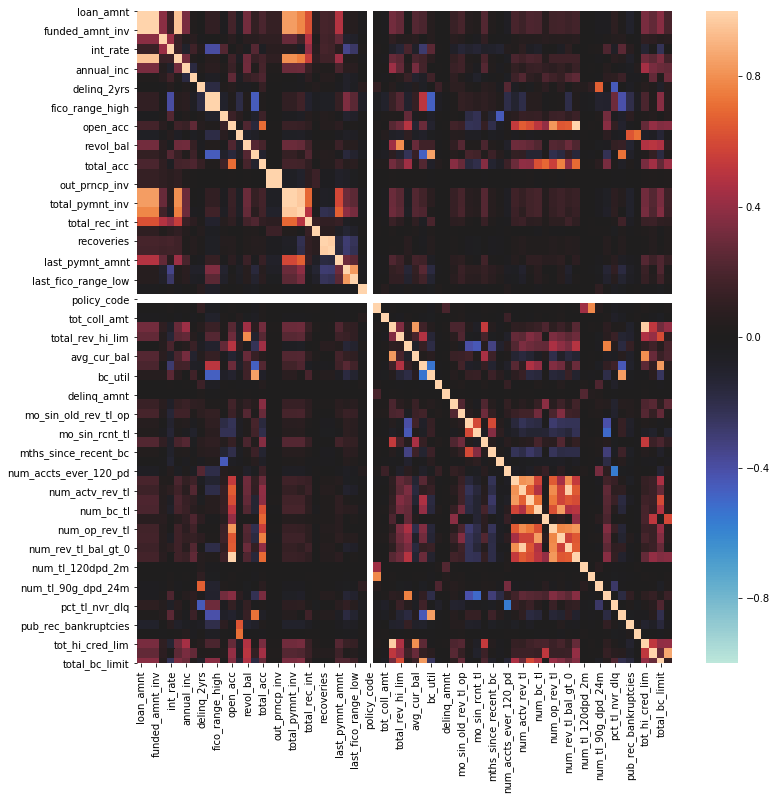

In [74]:
plt.figure(figsize=(12,12))
sns.heatmap(corr, vmin=-1, vmax=1, center=0)

In [75]:
df_accept["policy_code"].value_counts()

1.0    123208
Name: policy_code, dtype: int64

In [76]:
# based on the above graph we can see that policy code have only 1 in all the columns so removing the columns

In [77]:
df_accept.drop(["policy_code"], inplace=True, axis=1)

In [78]:
X = df_accept.drop("loan_status", axis = 1)

In [79]:
y = df_accept[["loan_status"]] 

In [80]:
def check_and_append_dummy_to_df(df):
    for column in df.columns:
        if df[column].dtype.name == "category":
            dummy = pd.get_dummies(df[column], prefix=column, prefix_sep="_")
            df = pd.concat([df,dummy], axis=1)
            df.drop(column, axis=1, inplace=True)
    return df

In [81]:
X = check_and_append_dummy_to_df(X)

In [82]:
type(X)

pandas.core.frame.DataFrame

In [83]:
X.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_title,annual_inc,title,zip_code,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,grade_A,grade_B,grade_C,...,pymnt_plan_n,pymnt_plan_y,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AK,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,hardship_flag_N,hardship_flag_Y,disbursement_method_Cash,disbursement_method_DirectPay,debt_settlement_flag_N,debt_settlement_flag_Y
552593,17000.0,17000.0,17000.0,60,30.84,558.82,Union Laborer,50000.0,Credit card refinancing,027xx,19.01,0.0,670.0,674.0,0.0,7.0,1.0,16601.0,56.3,15.0,0.0,0.0,7480.990000,7480.99,1079.52,3942.69,111.76,2347.02,211.2318,590.00,544.0,540.0,0.0,0.0,302.0,16601.0,29500.0,5.0,2372.0,7947.0,50.3,0.0,0.0,135.0,296.0,1.0,1.0,1.0,1.0,18.0,0.0,4.0,5.0,5.0,5.0,3.0,7.0,11.0,5.0,7.0,0.0,0.0,0.0,3.0,100.0,40.0,1.0,0.0,29500.0,16601.0,16000.0,0.0,0,0,0,...,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0
317869,16000.0,16000.0,16000.0,36,9.17,510.07,Managing Partner,125000.0,Credit card refinancing,358xx,12.31,0.0,680.0,684.0,0.0,20.0,0.0,31996.0,53.3,28.0,0.0,0.0,18303.619875,18303.62,16000.00,2303.62,0.00,0.00,0.0000,3009.67,574.0,570.0,0.0,0.0,0.0,256596.0,60000.0,9.0,12830.0,15776.0,60.1,0.0,0.0,169.0,88.0,4.0,4.0,3.0,4.0,5.0,0.0,9.0,15.0,11.0,13.0,3.0,18.0,22.0,15.0,20.0,0.0,0.0,0.0,2.0,100.0,63.6,0.0,0.0,313410.0,33831.0,39500.0,22712.0,0,1,0,...,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0
1146376,10000.0,10000.0,10000.0,36,7.49,311.02,Accounting Manager,92500.0,Debt consolidation,301xx,13.30,1.0,665.0,669.0,1.0,13.0,1.0,15715.0,38.9,40.0,0.0,0.0,11101.393777,11101.39,10000.00,1101.39,0.00,0.00,0.0000,3330.05,704.0,700.0,0.0,0.0,790.0,21918.0,40400.0,6.0,1827.0,21298.0,31.5,0.0,0.0,153.0,361.0,4.0,4.0,2.0,15.0,4.0,2.0,5.0,7.0,6.0,16.0,8.0,11.0,30.0,7.0,12.0,0.0,0.0,0.0,3.0,87.9,50.0,1.0,0.0,50400.0,21918.0,31100.0,10000.0,1,0,0,...,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,

In [84]:
len(X.columns)

209

In [85]:
X.columns.values

array(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'emp_title', 'annual_inc', 'title', 'zip_code',
       'dti', 'delinq_2yrs', 'fico_range_low', 'fico_range_high',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim', 'acc_open_past_24mths',
       'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq',
       'num_accts_ever_120_pd', 'num_actv_b

In [86]:
object_columns = ['emp_title', 'title', 'zip_code']

In [87]:
# droping object_column tempararily later we will do stuff
X.drop(object_columns, axis=1, inplace=True)

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [89]:
scaler = MinMaxScaler()

In [90]:
transformed = scaler.fit_transform(X)

In [91]:
transformed[:10]

array([[0.41025641, 0.41025641, 0.41401274, ..., 0.        , 1.        ,
        0.        ],
       [0.38461538, 0.38461538, 0.38853503, ..., 0.        , 1.        ,
        0.        ],
       [0.23076923, 0.23076923, 0.23566879, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.23076923, 0.23076923, 0.23566879, ..., 0.        , 1.        ,
        0.        ],
       [0.48717949, 0.48717949, 0.49044586, ..., 0.        , 1.        ,
        0.        ],
       [0.31410256, 0.31410256, 0.31847134, ..., 0.        , 1.        ,
        0.        ]])

In [92]:
len(transformed)

123208

In [93]:
len(df_accept)

123208

In [94]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

In [95]:
y["loan_status"].value_counts()

1    97050
0    26158
Name: loan_status, dtype: int64

In [109]:
def process_model(ml, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    ml.fit(X_train, y_train)
    y_pred = ml.predict(X_test)
    print("Accuracy => ", accuracy_score(y_test,y_pred))
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print(f1_score(y_test, y_pred))
    return ml

In [97]:
from sklearn.linear_model import LogisticRegression

In [98]:
lm = process_model(LogisticRegression(), transformed, y.values)

123208
123208
86245
86245


/home/d/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/d/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy =>  0.9867705543381219
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      7871
           1       0.99      1.00      0.99     29092

    accuracy                           0.99     36963
   macro avg       0.99      0.97      0.98     36963
weighted avg       0.99      0.99      0.99     36963

[[ 7490   381]
 [  108 28984]]
0.9916348769180766


In [99]:
import pickle
filename = '../data/prod/finalized_model.sav'
pickle.dump(lm, open(filename, 'wb'))

In [100]:
lr = pickle.load(open(filename, 'rb'))

In [101]:
final_columns = [*X.columns.values, *y.columns.values]

In [102]:
final_columns

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_inq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 

In [119]:
import numpy as np

In [138]:
y["loan_status"] = y["loan_status"].astype("int")

/home/d/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [141]:
two_d_y = y["loan_status"].values.reshape(-1,1)

In [142]:
transformed

array([[0.41025641, 0.41025641, 0.41401274, ..., 0.        , 1.        ,
        0.        ],
       [0.38461538, 0.38461538, 0.38853503, ..., 0.        , 1.        ,
        0.        ],
       [0.23076923, 0.23076923, 0.23566879, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.15384615, 0.15384615, 0.15923567, ..., 0.        , 1.        ,
        0.        ],
       [0.5724359 , 0.5724359 , 0.57515924, ..., 0.        , 1.        ,
        0.        ],
       [0.17948718, 0.17948718, 0.18471338, ..., 0.        , 1.        ,
        0.        ]])

In [144]:
final_2d = np.concatenate([transformed, two_d_y], axis=1)

In [145]:
len(final_2d)

123208

In [146]:
final_df = pd.DataFrame(final_2d, columns=final_columns)

In [147]:
final_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,...,pymnt_plan_y,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AK,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,hardship_flag_N,hardship_flag_Y,disbursement_method_Cash,disbursement_method_DirectPay,debt_settlement_flag_N,debt_settlement_flag_Y,loan_status
0,0.410256,0.410256,0.414013,1.0,0.994159,0.339653,0.005213,0.019029,0.000000,0.054054,0.053763,0.000000,0.079545,0.018519,0.006462,0.316826,0.087838,0.0,0.0,0.118289,0.118374,0.026988,0.141067,0.155733,0.058882,0.029441,0.014233,0.640000,0.639053,0.0,0.0,0.001547,0.004277,0.00295,0.089286,0.005081,0.024349,0.247905,0.0,0.0,0.266272,0.346290,0.002915,0.007143,0.032258,0.001779,0.72,0.000000,0.121212,0.096154,0.102041,0.083333,0.023438,0.109375,0.086957,0.111111,0.080460,0.0,0.0,0.0,0.107143,1.000,0.400,0.125,0.0,0.002950,0.006278,0.035072,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.384615,0.384615,0.388535,0.0,0.150312,0.309260,0.013047,0.012322,0.000000,0.108108,0.107527,0.000000,0.227273,0.000000,0.012455,0.299944,0.175676,0.0,0.0,0.290324,0.290532,0.400000,0.082422,0.000000,0.000000,0.000000,0.072604,0.675294,0.674556,0.0,0.0,0.000000,0.066108,0.00600,0.160714,0.027483,0.048337,0.296205,0.0,0.0,0.333333,0.101296,0.011662,0.028571,0.096774,0.007117,0.20,0.000000,0.272727,0.288462,0.224490,0.216667,0.023438,0.281250,0.182609,0.333333,0.229885,0.0,0.0,0.0,0.071429,1.000,0.636,0.000,0.0,0.031341,0.012793,0.086585,0.025166,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [148]:
final_df.to_csv("../data/prod/final_data.csv", index=False)

In [103]:
# from sklearn.tree import DecisionTreeClassifier

In [104]:
# process_model(DecisionTreeClassifier(), X, y)

In [105]:
# from sklearn.neighbors import KNeighborsClassifier

In [106]:
# process_model(KNeighborsClassifier(), X, y)

In [107]:
# from sklearn.svm import SVC

In [108]:
# process_model(SVC(), X, y)